## Tweet Emotion Recognition: Natural Language Processing with TensorFlow

---

Dataset: [Tweet Emotion Dataset](https://github.com/dair-ai/emotion_dataset)


## Setup and Imports

1. Installing Hugging Face's nlp package
2. Importing libraries

In [ ]:
!pip install nlp # It will be used to extract the dataset for tweet emotion recognition.

In [ ]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random


def show_history(h):
    #The show_history function is designed to visualize the training and validation accuracy and loss of a model over epochs.
    #The parameter h is expected to be the history object returned by the fit method of a Keras or TensorFlow model. This object contains the recorded values of metrics during training.

    #Calculates the number of epochs the model has been trained for, based on the length of the loss history list.
    epochs_trained = len(h.history['loss'])
    #Creates a new figure with a specified size of 16 by 6 inches.
    plt.figure(figsize=(16, 6))

    #Creates a subplot in a 1x2 grid, selecting the first position (left).
    plt.subplot(1, 2, 1)

    #Plots the training accuracy against epochs.
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')

    #Plots the validation accuracy against epochs.
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')

    #Sets the y-axis limits to range from 0 to 1.
    plt.ylim([0., 1.])
    #Labels the x-axis as "Epochs".
    plt.xlabel('Epochs')
    # Labels the y-axis as "Accuracy".
    plt.ylabel('Accuracy')
    #Adds a legend to distinguish between training and validation accuracy.
    plt.legend()

    #Creates a subplot in the second position (right side) of the 1x2 grid.
    plt.subplot(1, 2, 2)

    #Plots the training loss against epochs.
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')

    #Plots the validation loss against epochs.
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')

    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    #Adds a legend to distinguish between training and validation loss.
    plt.legend()
    plt.show()


def show_confusion_matrix(y_true, y_pred, classes):

    '''The show_confusion_matrix function creates and visualizes a confusion matrix for a classification model,
       helping to evaluate its performance.
       y_true: The actual labels of the test dataset.
       y_pred: The predicted labels from the model.
       classes: A list of class names corresponding to the labels.'''

    from sklearn.metrics import confusion_matrix

    #Computes the confusion matrix and normalizes the values by the number of true instances for each class. The resulting matrix has values representing the proportion of correct predictions for each class.
    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(5, 5))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm) #Displays the confusion matrix as an image.

    # Add annotations with numbers inside the cells
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, f"{cm[i, j]*100:.1f}%", ha='center', va='center', color='white', fontsize=8)

    plt.xticks(list(range(0, 6)), labels=classes) #Sets the x-axis tick labels to the class names.
    plt.yticks(list(range(0, 6)), labels=classes) #Sets the y-axis tick labels to the class names.
    plt.colorbar(ctx) #Adds a color bar to the plot, which indicates the scale of the values in the confusion matrix.
    #Displays the plots.
    plt.show()


print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.15.0


## Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [ ]:
pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 16.1.0 which is incompatible.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.

In [ ]:
from datasets import load_dataset

# Load the emotion dataset
dataset = load_dataset("dair-ai/emotion")

# Print the dataset structure
print(dataset)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


The repository for dair-ai/emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/dair-ai/emotion.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})


In [ ]:
train = dataset['train']
val = dataset['validation']
test = dataset['test']

In [ ]:
def datasets(data):
    tweets = [i for i in data['text']]
    labels = [y for y in data['label']]
    return tweets, labels

In [ ]:
train_tweets, train_labels = datasets(train)

In [ ]:
train_tweets[0],train_labels[0]

('i didnt feel humiliated', 0)

## Tokenizer

1. Tokenizing the tweets

In [ ]:
# Tokenizer class is used for converting text into a sequence of integers, where each integer represents a unique word in the text corpus.. It will create a corpus of all existing words in the dataset. It will give
# each unique word a unique corresponding token.
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
#Only the 10,000 most frequent words in dataset will be considered for tokenization. This helps manage memory and focus on the most important words in your texts.
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')
tokenizer.fit_on_texts(tweets)

In [ ]:
tokenizer.texts_to_sequences([train_tweets[0]])

[[2, 139, 3, 679]]

In [ ]:
train_tweets[0]

'i didnt feel humiliated'

## Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

(array([2641., 3795., 3968., 2306., 1499.,  963.,  453.,  251.,  106.,
          18.]),
 array([ 2. ,  8.4, 14.8, 21.2, 27.6, 34. , 40.4, 46.8, 53.2, 59.6, 66. ]),
 <BarContainer object of 10 artists>)

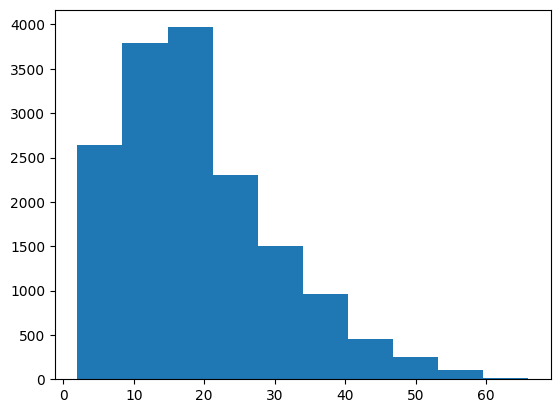

In [ ]:
tweets_len = [len(i.split(' ')) for i in train_tweets]
plt.hist(tweets_len)

In [ ]:
def get_sequences(tweets, tokenizer):
  sequences=tokenizer.texts_to_sequences(tweets)
  padded__Sequences = pad_sequences(sequences,truncating='post',padding='post',maxlen=50)
  return padded__Sequences

In [ ]:
train_sequences = get_sequences(train_tweets,tokenizer)

In [ ]:
train_sequences[0]

array([  2, 139,   3, 679,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

## Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels

In [ ]:
classes=['sadness','joy','love','anger','fear','surprise']

In [ ]:
class_to_index = {c: i for i, c in enumerate(classes)}
class_to_index

{'sadness': 0, 'joy': 1, 'love': 2, 'anger': 3, 'fear': 4, 'surprise': 5}

In [ ]:
index_to_class = {i: c for c, i in class_to_index.items()}
index_to_class

{0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}

## Creating the Model

1. Creating the model
2. Compiling the model

In [ ]:
#This is a basic structure in Keras where you can stack layers sequentially, one after the other.
model = tf.keras.models.Sequential([
    #Converts words or tokens into fixed-size vectors.
    tf.keras.layers.Embedding(10000, 16, input_length=50),
    #LSTM (Long Short-Term Memory) layers are good at learning patterns in sequences.
    # These layers process input sequences in both directions (forward and backward), which helps capture context from both past and future.
    #LSTM(20): Each LSTM layer has 20 units (or neurons). These units remember information over long sequences, making them ideal for tasks like text classification.
    #return_sequences=True This setting means the layer outputs a sequence for each input timestep, not just the last one.
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20,return_sequences=True)),
    #This defaults to outputting only the last timestep's result.
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    #This is the final layer that outputs probabilities for each class.
    #There are 6 output units, corresponding to 6 classes that the model will predict.
    #Softmax activation function ensures the output probabilities sum up to 1, making it suitable for multi-class classification tasks.
    tf.keras.layers.Dense(6, activation='softmax')
]
)

#This configures the model for training.
model.compile(
    #Measures how far off the model's predictions are from the actual labels.
    #sparse_categorical_crossentropy: Used when your labels (target outputs) are integers. It's commonly used in classification tasks.
    loss='sparse_categorical_crossentropy',
    #adam: An optimizer that adjusts the learning rate dynamically throughout training, making it efficient and effective for many types of models.
    optimizer='adam',
    # Measures how often the model's predictions match the true labels. Higher accuracy indicates better performance.
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 50, 16)            16000     
                                                                 
 bidirectional_8 (Bidirecti  (None, 50, 40)            5920      
 onal)                                                           
                                                                 
 bidirectional_9 (Bidirecti  (None, 40)                9760      
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 6)                 246       
                                                                 
Total params: 31926 (124.71 KB)
Trainable params: 31926 (124.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#16,000 parameters are used, based on the size of the vocabulary (1000 words) and the vector size (16).
#"parameters" here specifically refers to the weights associated with the embedding matrix used to
#transform words into dense numerical vectors, which the model can process effectively. These parameters
#are crucial for the model to learn meaningful representations of words based on their context and usage within your dataset.



## Training the Model

1. Preparing a validation set
2. Training the model

In [ ]:
val_tweets, val_labels = datasets(val)

In [ ]:
val_sequences = get_sequences(val_tweets, tokenizer)

In [ ]:
val_tweets[0],val_labels[0]

('im feeling quite sad and sorry for myself but ill snap out of it soon', 0)

In [ ]:
mod = model.fit(
    train_sequences,np.array(train_labels),
    validation_data=(val_sequences,np.array(val_labels)),
    epochs=20,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=2)])

Epoch 1/20
500/500 [==============================] - 47s 78ms/step - loss: 1.3043 - accuracy: 0.5010 - val_loss: 1.0525 - val_accuracy: 0.6010
Epoch 2/20
500/500 [==============================] - 36s 73ms/step - loss: 0.6851 - accuracy: 0.7561 - val_loss: 0.6559 - val_accuracy: 0.7625
Epoch 3/20
500/500 [==============================] - 35s 71ms/step - loss: 0.3640 - accuracy: 0.8779 - val_loss: 0.4657 - val_accuracy: 0.8525
Epoch 4/20
500/500 [==============================] - 35s 70ms/step - loss: 0.2233 - accuracy: 0.9306 - val_loss: 0.4137 - val_accuracy: 0.8775
Epoch 5/20
500/500 [==============================] - 39s 78ms/step - loss: 0.1515 - accuracy: 0.9532 - val_loss: 0.3977 - val_accuracy: 0.8830
Epoch 6/20
500/500 [==============================] - 37s 75ms/step - loss: 0.1104 - accuracy: 0.9668 - val_loss: 0.4196 - val_accuracy: 0.8795
Epoch 7/20
500/500 [==============================] - 35s 71ms/step - loss: 0.0858 - accuracy: 0.9735 - val_loss: 0.3897 - val_accuracy:

## Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

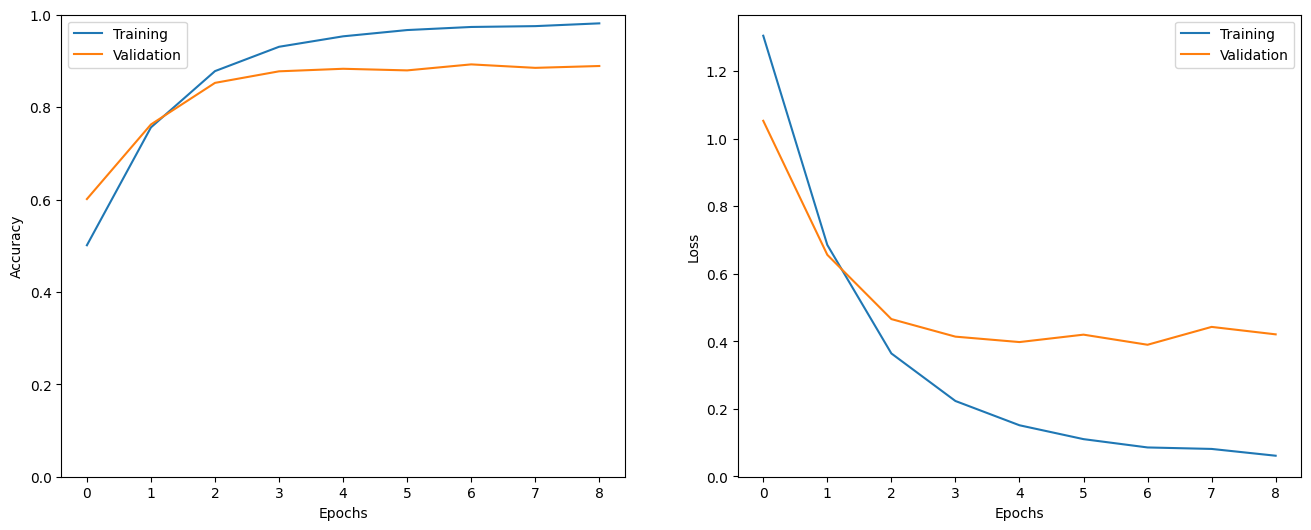

In [ ]:
show_history(mod)

In [ ]:
test_tweets, test_labels = datasets(test)

In [ ]:
test_sequences = get_sequences(test_tweets, tokenizer)

In [ ]:
test_labels = np.array(test_labels)

In [ ]:
_ = model.evaluate(test_sequences,test_labels)

63/63 [==============================] - 1s 16ms/step - loss: 0.4288 - accuracy: 0.8765


In [ ]:
i = random.randint(0, len(test_labels) - 1)


In [ ]:
print('Sentence:', test_tweets[i])

Sentence: i feel benevolent enough to buy them some peanuts and other treats


In [ ]:
print('Emotion:', index_to_class[test_labels[i]])

Emotion: joy


In [ ]:
p = model.predict(np.expand_dims(test_sequences[i], axis=0))[0]

1/1 [==============================] - 0s 52ms/step


In [ ]:
pred_class = index_to_class[np.argmax(p).astype('uint8')]


In [ ]:
print('Predicted Emotion:', pred_class)


Predicted Emotion: joy


In [ ]:
# Generate predictions
y_pred = model.predict(test_sequences)
y_pred_labels = np.argmax(y_pred, axis=1)

63/63 [==============================] - 3s 47ms/step


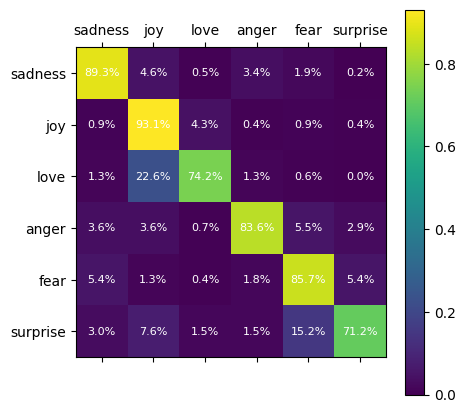

In [ ]:
# Show confusion matrix
show_confusion_matrix(test_labels, y_pred_labels, classes)